# The task

The model predicts the recovery rate of gold from gold ore

The model will help to optimize production in order not to launch an enterprise with unprofitable characteristics.


## Table of contents

[Step 1. Load the data and prepare for their analysis](#1)

[Step 2. Data analisis](#2)

[Step 3. Model](#3) 
 

# 1. Load the data and prepare for their analysis <a name="1"></a>

### 1.1. Review the data

In [1]:
!pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.0)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error, make_scorer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

In [3]:
train_df = pd.read_csv('/datasets/gold_recovery_train.csv')
train_df.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test_df = pd.read_csv('/datasets/gold_recovery_test.csv')
test_df.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full_df = pd.read_csv('/datasets/gold_recovery_full.csv')
full_df.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [7]:
#check for passes
train_df.isnull().sum().sum()

30320

In [8]:
test_df.isnull().sum().sum()

2360

In [9]:
full_df.isnull().sum().sum()

36587

In [10]:
#check for duplicates
train_df.duplicated().sum()

0

In [11]:
test_df.duplicated().sum()

0

In [12]:
full_df.duplicated().sum()

0

In [13]:
print('Size of the training sample:', train_df.shape)
print('Size of the test sample:', test_df.shape)
print('Size of the full data:', full_df.shape)

Размер обучающей выборки (16860, 87)
Размер тестовой выборки (5856, 53)
Размер полного датасета (22716, 87)


### 1.2. Check that the enrichment efficiency is calculated correctly. Calculate it on the training set for the rougher.output.recovery feature. Find the MAE between your calculations and the attribute value. Describe your findings.

* C — fraction of gold in concentrate after flotation / refining;
* F — fraction of gold in raw material / concentrate before flotation / refining;
* T — fraction of gold in tailings after flotation / cleaning.

* recovery = C*(F - T)/ F*(C - T) * 100%

* ag, pb, sol, au
* C = rougher.output.concentrate
* F = rougher.input.feed
* T = rougher.output.tail

* rougher.output.recovery

In [14]:
#create a variable with correct answers
recovery_answers = train_df['rougher.output.recovery']
recovery_answers.describe()

count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: rougher.output.recovery, dtype: float64

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> The column with the correct answers has max is 100 and min is zero. Let's limit our recovery calculations to the same limits. Otherwise, the calculation starts vary from minus infinity to plus infinity..</div>

In [15]:
#function to count recovery
def recovery_train(C, F, T):
    recovery = (C*(F - T))/(F*(C-T))*100
    recovery[recovery < 0] = 0
    recovery[recovery > 100] = 0
    return round(recovery, 2)

#recovery = recovery.replace([np.inf, -np.inf], np.nan)

In [16]:
#replace missing answers with zeros
recovery_answers = train_df['rougher.output.recovery'].fillna(0)

In [17]:
#function for calculating the mean absolute error
def mean_error(predict, title):
    predict = predict.fillna(0)
    mae = mean_absolute_error(recovery_answers, predict)
    print(title)
    print()
    print(predict.describe())
    print()
    print('mae = ', mae)

In [18]:
#on assignment, we need to calculate the recovery for gold only
recovery_au = recovery_train(train_df['rougher.output.concentrate_au'],
                          train_df['rougher.input.feed_au'],train_df['rougher.output.tail_au'])

In [19]:
mean_error(recovery_au, 'recovery_au' )

recovery_au

count    16860.000000
mean        69.820019
std         32.727798
min          0.000000
25%         73.910000
50%         83.410000
75%         89.342500
max        100.000000
dtype: float64

mae =  0.002078221276944357


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> The average absolute error is small, which means that recovery is calculated correctly. </div>

In [20]:
#let's see what columns are missing in the test
set_1 = train_df.columns
set_2 = test_df.columns
names = []
for column in set_1:
    if column not in set_2:
        names.append(column)
names 

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> the test is missing columns with target characteristics and columns with values that may be calculated later.</div>

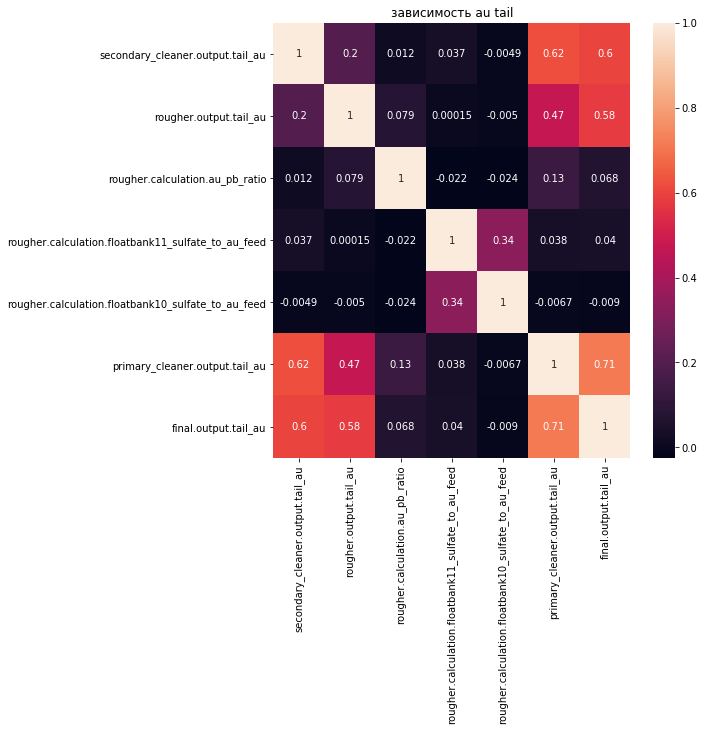

In [21]:
#check if there is a relationship between missing columns in the test and target features
def heatmap(data, title):
    cols = ['secondary_cleaner.output.tail_au','rougher.output.tail_au','rougher.calculation.au_pb_ratio',
            'rougher.calculation.floatbank11_sulfate_to_au_feed','rougher.calculation.floatbank10_sulfate_to_au_feed',
            'primary_cleaner.output.tail_au','final.output.tail_au']
    plt.figure(figsize=(8, 8))
    hm = sns.heatmap(data[cols].corr(), cbar=True, annot=True)
    plt.title(title)
    plt.show();
    
heatmap(train_df, 'relationship au tail')    

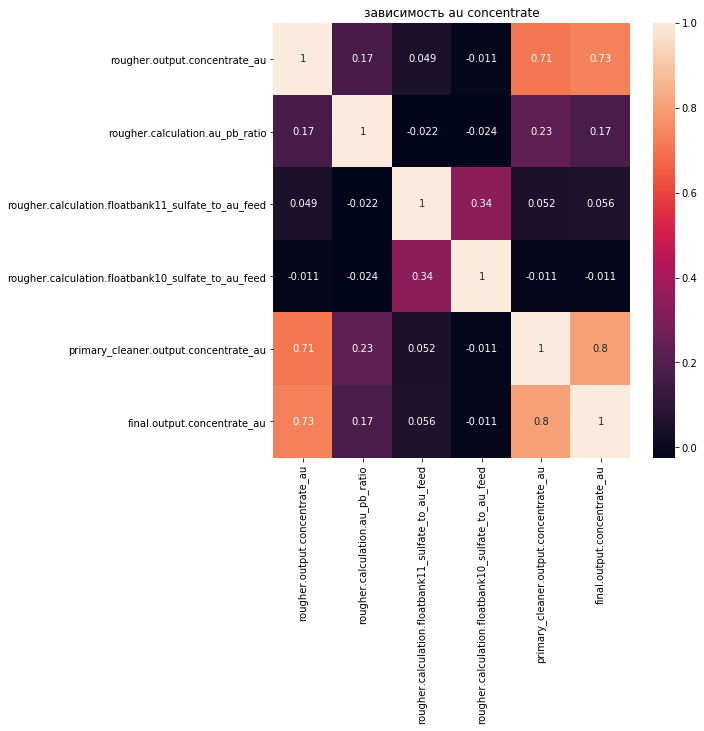

In [22]:
def heatmap(data, title):
    cols = ['rougher.output.concentrate_au','rougher.calculation.au_pb_ratio',
            'rougher.calculation.floatbank11_sulfate_to_au_feed','rougher.calculation.floatbank10_sulfate_to_au_feed',
            'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
    plt.figure(figsize=(8, 8))
    hm = sns.heatmap(data[cols].corr(), cbar=True, annot=True)
    plt.title(title)
    plt.show();
    
heatmap(train_df, 'relationship au concentrate')  

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> the graph shows that the correlation is very negligible. It proofs that values are calculated later.</div>

In [23]:
#the test hasn't columns with target. Let's take them from the complete dataset. Let's make the column index date
full=full_df[['final.output.recovery','rougher.output.recovery', 'date']]

test=test_df.merge(full, on='date', how='inner')
#test.columns

In [24]:
#remove the date column. it does not affect the target trait. Since a negative amount of reagent can not be added,
# to eliminate the human factor, let's make all dataset positive values.
train_df = train_df.drop('date', axis=1).abs()
test=test.drop('date', axis=1).abs()
#train_df.columns
#test.columns

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> 
At this stage, we examined the data. Datasets contain many gaps, no full duplicates. Some columns are missing in the test dataset.
Of course, you can fill in the gaps with the closest values. But I think it is not advisable. Because whole blocks with missing values ​​are observed. This means that we can get 10 or more of the same values, which can be bad for our model. And it will be very difficult to exclude such data. Whereas zeros can always be excluded. Therefore, in further work I will fill in the gaps with zeros. If the final value of smape does not suit me, then I will change my mind. We analyzed the missing columns in the test and added a target feature. The data is ready for further work. </div>

# 2. Data analisis <a name="2"></a>

### Let's see how the concentration of metals (Au, Ag, Pb) changes at different stages of purification. Describe the findings.

In [25]:
stages = ['rougher.output.concentrate','primary_cleaner.output.concentrate','final.output.concentrate']
metals = ['au', 'ag', 'pb']

In [26]:
def show_plot(stage):
    plt.title(stage)
    cols = [stage+'_'+col for col in metals]
    g = sns.kdeplot(data=train_df.loc[:, cols].dropna(), fill=True, common_norm=False, alpha=.5, legend=False)
    plt.legend(title='Metals', loc='upper right', labels=metals)
    plt.show();

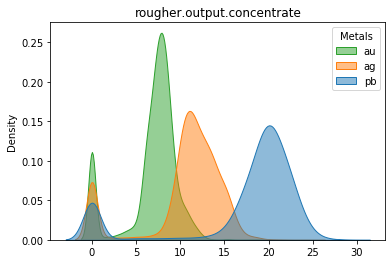

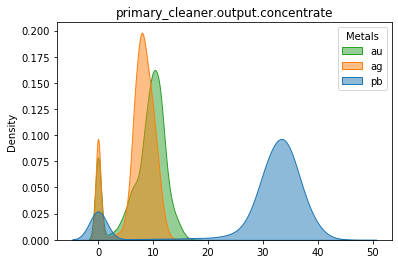

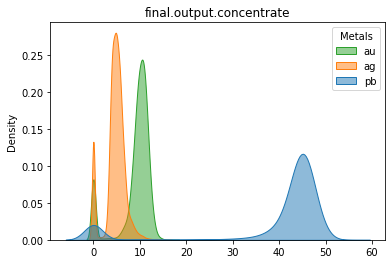

In [27]:
show_plot(stages[0])
show_plot(stages[1])
show_plot(stages[2])

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b>The graphs shows that during the cleaning process, the concentration of gold increases, we note a fairly large number of zero values</div>

### Compare the distributions of the granule sizes of raw materials on the training and test samples. If the distributions are very different from each other, the model's estimate will be incorrect.

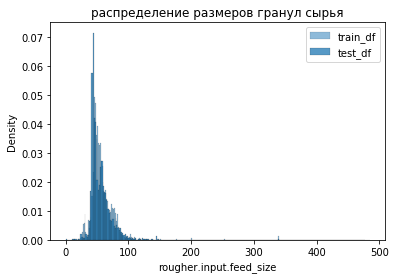

In [28]:
sns.histplot(train_df['rougher.input.feed_size'].dropna(), label='train_df', alpha =0.5,stat='density')
sns.histplot(test_df['rougher.input.feed_size'].dropna(), label='test_df',stat='density')
plt.legend()
plt.title('distribution of raw material granules');

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> the distributions of the granule sizes of raw materials on the training and test samples are very similar</div>

### Investigate the total concentration of all substances at different stages: in raw materials, in rough and final concentrates. Have you noticed anomalous values ​​in the total distribution or not? If they are, is it worth removing them from both selections? Describe the findings and remove the anomalies.

In [29]:
stages_sum = ['rougher.input.feed','rougher.output.concentrate',
              'primary_cleaner.output.concentrate','final.output.concentrate']
metals = ['au', 'ag', 'pb']

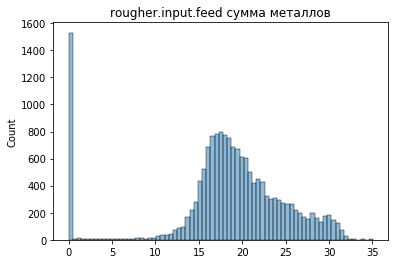

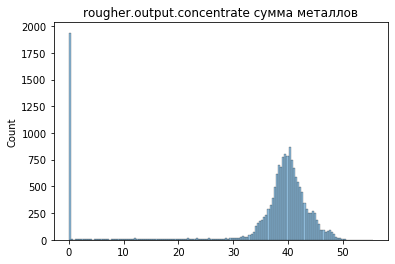

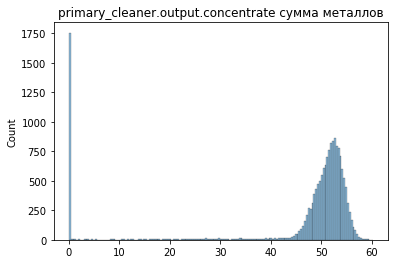

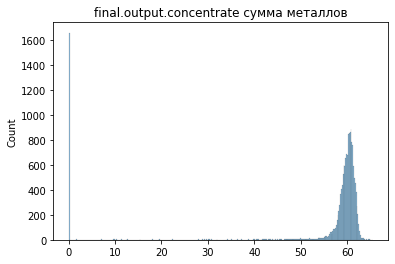

In [30]:
def show_sum_plot(stage):
    plt.title(stage + ' sum of metals')
    cols = [stage+'_'+col for col in metals]
    g = sns.histplot(data=train_df.loc[:, cols].dropna().sum(axis=1), fill=True, common_norm=False, alpha=.5, legend=False)
    plt.show();
    
show_sum_plot(stages_sum[0])  
show_sum_plot(stages_sum[1])  
show_sum_plot(stages_sum[2])  
show_sum_plot(stages_sum[3])  

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b>the graphs clearly show a large number of zeros. Delete them</div>

In [31]:
train_df = train_df.replace(0, np.nan)
train_df = train_df.dropna(how='any', axis=0)


test_df = test_df.replace(0, np.nan)
test_df = test_df.dropna(how='any', axis=0)

test = test.replace(0, np.nan)
test = test.dropna(how='any', axis=0)

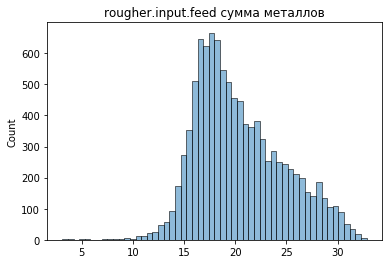

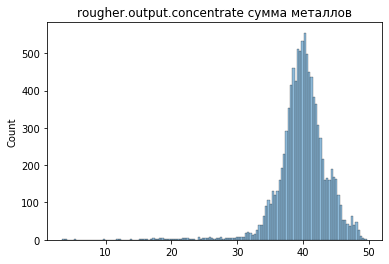

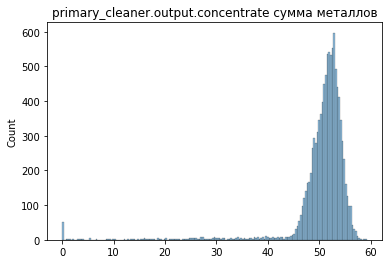

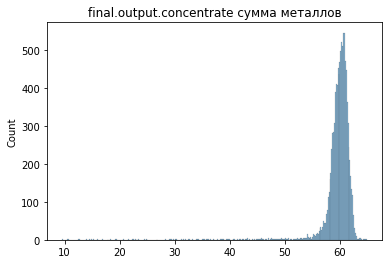

In [32]:
show_sum_plot(stages_sum[0])  
show_sum_plot(stages_sum[1])  
show_sum_plot(stages_sum[2])  
show_sum_plot(stages_sum[3])

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> 
having built the graphs again, we made sure that there are no zero values.</div>

# 3. Model <a name="3"></a>

### Write a function to calculate the final sMAPE

In [33]:
def smape(answer, predict):
    return 1/len(answer) * np.sum(2 * np.abs(predict-answer) / (np.abs(answer) + np.abs(predict))*100)

In [34]:
#we will highlight the signs and target signs. Since we need to get two values, then there are two target features.
train_features = train_df[test.columns].drop(['final.output.recovery','rougher.output.recovery'], axis = 1)
test_features = test.drop(['final.output.recovery','rougher.output.recovery'], axis = 1)

train_target_final = train_df['final.output.recovery']
train_target_rougher = train_df['rougher.output.recovery']

test_target_final = test['final.output.recovery']
test_target_rougher=test['rougher.output.recovery']

print(train_features.shape)
print(train_target_final.shape)
print(train_target_rougher.shape)
print()
print(test_features.shape)
print(test_target_final.shape)
print(test_target_rougher.shape)


(10285, 52)
(10285,)
(10285,)

(5105, 52)
(5105,)
(5105,)


### 3.2.Train different models and evaluate their quality by cross-validation. Choose the best model and test it on a test set. Describe your findings.

In [35]:
#regression decision tree model for the efficiency of the final concentrate beneficiation
best_result=10000
best_depth=0
for depth in range(1,11):
    model=DecisionTreeRegressor(random_state=90, max_depth=depth)
    
    cross=cross_val_score(model,train_features,train_target_final, cv=4, scoring=make_scorer(smape,greater_is_better=False))
    result = cross.mean()
    
    if result>best_result:
        best_result=result
        best_depth=depth
print('smape =', result, ', best_depth =',best_depth )

smape = -13.21984509403397 , best_depth = 0


In [36]:
#I commented out this block. Because you can see that the calculation time for the best hyperparameters for the model is 14 minutes.
# answer copied below
# if you want, you can always check it.

#random forest regression model for the efficiency of the final concentrate beneficiation
#%%time

#best_result=10000
#best_est=0
#best_deptht=0
#for est in range(10,51,10):
    #for depth in range(1,11):
        #model=RandomForestRegressor(random_state=90, n_estimators = est, max_depth=depth)
        #cross=cross_val_score(model,train_features,train_target_final, cv=4, scoring=make_scorer(smape,greater_is_better=False))
        #result = cross.sum()/len(cross)
        
        #if result<best_result:
            #best_result=result
            #best_depth=depth
            #best_est=est
#print('smape =', result, ', best_depth =',best_depth, ', best_est = ', best_est )

#smape = -10.200631445062111 , best_depth = 1 , best_est =  10
#CPU times: user 14min 12s, sys: 928 ms, total: 14min 13s
#Wall time: 14min 27s

In [37]:
#linear regression model for the efficiency of the final concentrate beneficiation
model=LinearRegression(normalize=True)
cross=cross_val_score(model,train_features,train_target_final, cv=4, scoring=make_scorer(smape,greater_is_better=False))
result = cross.sum()/len(cross)

print('smape =', result)

smape = -10.201735066593661


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> 
the best result was shown by the random forest model. smape = -10.200631445062111 </div>

In [38]:
#check the model on the test
model=RandomForestRegressor(random_state=90, n_estimators = 10, max_depth=1)
cross=cross_val_score(model,test_features,test_target_final, cv=4, scoring=make_scorer(smape,greater_is_better=False))
result = cross.sum()/len(cross)
print('smape =', result)

smape = -7.384311178758723


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusin:</b> the model has passed the test</div>

In [39]:
#calculate smape_final as a percentage for the concentration efficiency of the final concentrate
model=RandomForestRegressor(random_state=90, n_estimators = 10, max_depth=1)
model.fit(train_features,train_target_final)
predictions_test_final=model.predict(test_features)

In [40]:
smape_final = smape(test_target_final, predictions_test_final)
smape_final

7.930885669567405

In [41]:
#regression decision tree model for rough concentrate beneficiation efficiency
best_result=10000
best_depth=0
for depth in range(1,11):
    model=DecisionTreeRegressor(random_state=90, max_depth=depth)
    cross=cross_val_score(model,train_features,train_target_rougher, cv=4, scoring=make_scorer(smape,greater_is_better=False))
    result = cross.sum()/len(cross)

    if result<best_result:
        best_result=result
        best_depth=depth
print('smape =', result, ', best_depth =',best_depth )

smape = -9.164967171419313 , best_depth = 9


In [42]:
# I have commented out this block. Because you can see that the calculation time for the best hyperparameters for the model is 14 minutes.
# answer copied below
# if you want, you can always check it.

# random forest regression model for rough concentrate dressing efficiency

#%%time

#best_result=10000
#best_est=0
#best_deptht=0
#for est in range(10,51,10):
    #for depth in range(1,11):
        #model=RandomForestRegressor(random_state=90, n_estimators = est, max_depth=depth)
        #cross=cross_val_score(model,train_features, train_target_rougher, cv=4, scoring=make_scorer(smape, greater_is_better=False))
        #result = cross.sum()/len(cross)
    
        #if result<best_result:
            #best_result=result
            #best_depth=depth
            #best_est=est
#print('smape =', result, ', best_depth =',best_depth, ', best_est = ', best_est )

#smape = -7.136206028766104 , best_depth = 1 , best_est =  20 
#CPU times: user 14min 7s, sys: 1.05 s, total: 14min 8s
#Wall time: 14min 9s

In [43]:
# linear regression model for rough concentrate beneficiation efficiency
model=LinearRegression(normalize=True)
cross=cross_val_score(model,train_features,train_target_rougher, cv=4, scoring=make_scorer(smape, greater_is_better=False))
result = cross.sum()/len(cross)
print('smape =', result)

smape = -7.51884533759806


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> the best value was given by the random forest model with the value smape = -7.136206028766104</div>

In [44]:
#check on the test
model=RandomForestRegressor(random_state=90, n_estimators = 20, max_depth=1)
cross=cross_val_score(model,test_features,test_target_rougher, cv=4, scoring=make_scorer(smape,greater_is_better=False))
result = cross.sum()/len(cross)
print(result)

-4.81726519595311


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> the model has passed the test</div>

In [45]:
#calculate smape_rougher as a percentage for the rough concentrate dressing efficiency
model=RandomForestRegressor(random_state=90, n_estimators = 20, max_depth=1)
model.fit(train_features,train_target_rougher)
predictions_test_rougher=model.predict(test_features)

In [46]:
smape_rougher = smape(test_target_rougher, predictions_test_rougher)
smape_rougher

4.60072001116142

In [47]:
#calculate the final smape value
final = 0.25*smape_rougher + 0.75*smape_final
final

7.098344254965909

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> 
After research I found that a smape value of less than 10% is considered an excellent result. According to my calculations, the final value is smape = 7%. Our model, the Random Regression Forest, does a good job.</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>General conclusion:</b> In the process of work, we processed the initial data, checked whether the recovery was calculated correctly, looked at the graphs of the distribution of the concentration of metals. Columns with target features have been added to the dataset with test data. We built 3 different models and found the best parameters. We checked the best model on the test and calculated the final smape value, which fully confirms the quality of the model.</div>